In [2]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import numpy as np

finn_key = 'sandbox_cc7v412ad3i03fardc9g'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [3]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [4]:
def plot_chart(dataframe):
    return('hello no plotting done yet')

In [5]:
microsoft2020 = stock_df('MSFT', beg_2020, end_2020)
stock_date2020 = microsoft2020.set_index('Time')
stock_date2020.head()

,Close,High,Low,Open,Volume
Time,,,,,
2019-12-26,123.282900,123.492000,122.631000,123.000000,53
2020-01-02,123.837673,124.047714,123.182840,123.553500,21
2020-01-09,123.923327,124.605929,123.737162,124.109491,55
2020-01-16,124.146153,124.356717,123.489688,123.861272,87
2020-01-23,124.232020,124.916322,124.045392,124.418647,73


In [6]:
microsoft2021 = stock_df('MSFT', beg_2021, end_2021)
stock_date2021 = microsoft2021.set_index('Time')
stock_date2021.head()

,Close,High,Low,Open,Volume
Time,,,,,
2020-12-31,123.282900,123.492000,122.631000,123.000000,78
2021-01-07,123.368170,124.047714,123.182840,123.553500,9
2021-01-14,123.589998,123.799619,122.936474,123.306393,66
2021-01-21,124.146153,124.356717,123.489688,123.861272,28
2021-01-28,124.232020,124.916322,124.045392,124.418647,89


In [7]:
microsoft2019 = stock_df('MSFT', beg_2019, end_2019)
stock_date2019 = microsoft2019.set_index('Time')
stock_date2019.head()

,Close,High,Low,Open,Volume
Time,,,,,
2018-12-27,123.282900,123.492000,122.631000,123.000000,89
2019-01-03,123.837673,124.047714,123.182840,123.553500,82
2019-01-10,124.394943,124.605929,123.737162,124.109491,6
2019-01-17,124.954720,125.166655,124.293980,124.667983,11
2019-01-24,125.517016,125.729905,124.853302,125.228989,77


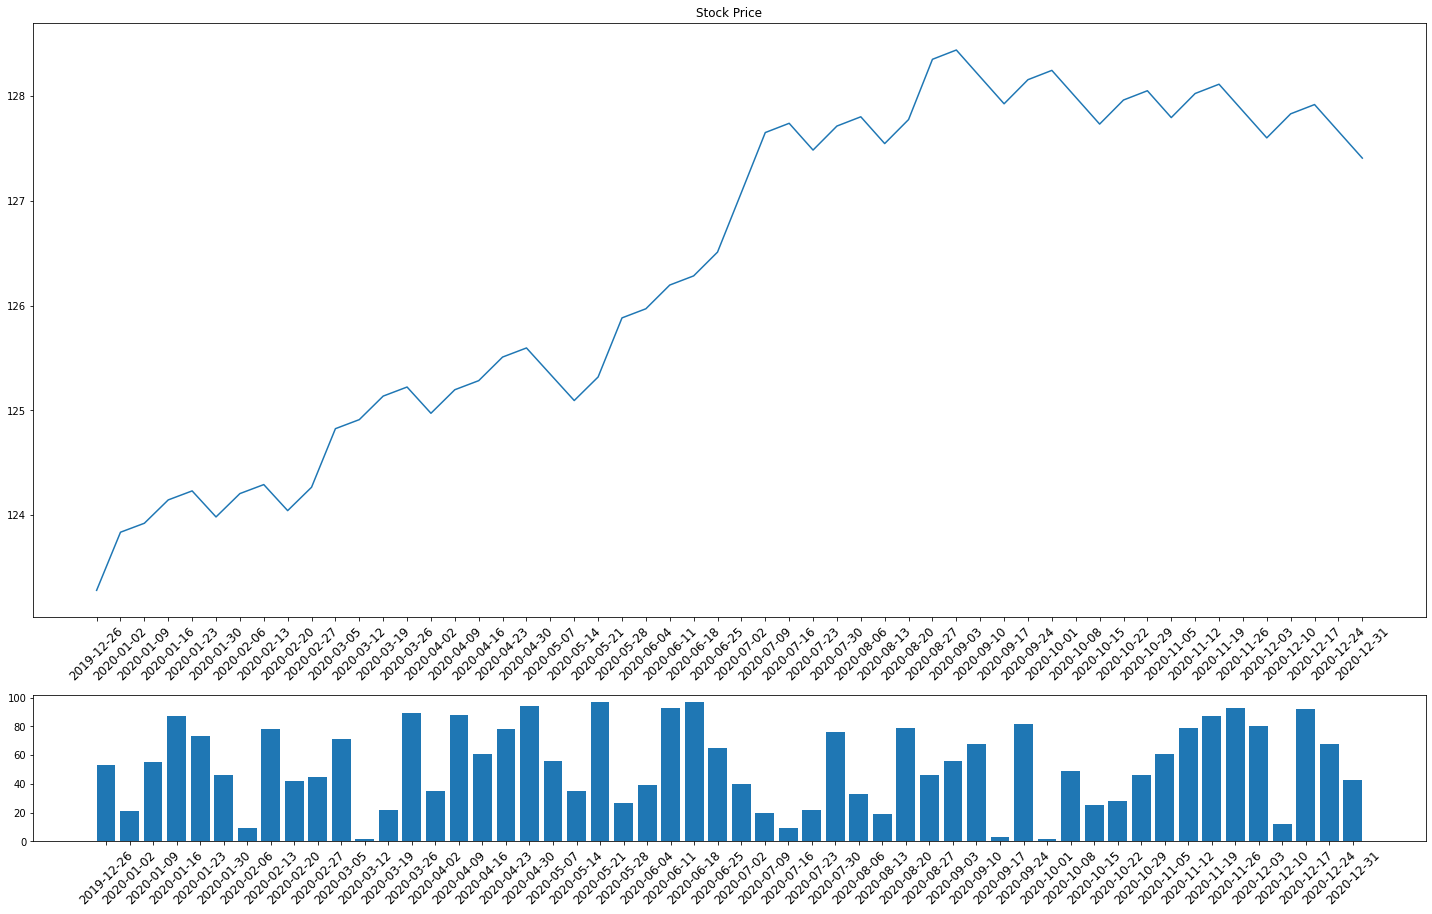

In [8]:
fig= plt.figure(figsize=(20,15))
top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
top_plt.plot(stock_date2020.index, stock_date2020['Close'])
plt.xticks(rotation=45, fontsize=12)
plt.title('Stock Price')
bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_date2020.index, stock_date2020['Volume'])
plt.xticks(rotation=45, fontsize=12)
fig.tight_layout();